<div align="center"><h3>HW4, Question 4</h3></div>
<div align="center"><h5>Mohammadreza Ghofrani, 400131076</h5></div>

In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Configuration Parameters

In [2]:
SAVE_FIGURE = False

# Initialization

Loading given dataset

In [3]:
train_data = np.load('data/P4/train-ubyte.npz')
test_data  = np.load('data/P4/test-ubyte.npz')

x_train, y_train = train_data['a'], train_data['b']
x_test,  y_test  = test_data['a'],  test_data['b']

Reshaping samples from 2d to 1d

In [4]:
x_train = x_train.reshape(x_train.shape[0], -1).T
x_test = x_test.reshape(x_test.shape[0], -1).T

# Part A

Performing PCA on given train dataset

In [5]:
pca_mu = np.mean(x_train, axis=1)[np.newaxis]
zero_mean_trainset = x_train - pca_mu.T

sigma = np.cov(zero_mean_trainset)
pca_eigenvalues, pca_eigenvectors = np.linalg.eig(sigma)

sorted_eigenvalues_index = np.argsort((-1) * pca_eigenvalues)
pca_eigenvalues = pca_eigenvalues[sorted_eigenvalues_index]
pca_eigenvectors = pca_eigenvectors[:, sorted_eigenvalues_index]

Plotting the top 20 eigenvectors

C:\Users\engmrgh\AppData\Local\Temp\ipykernel_25304\2687889022.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


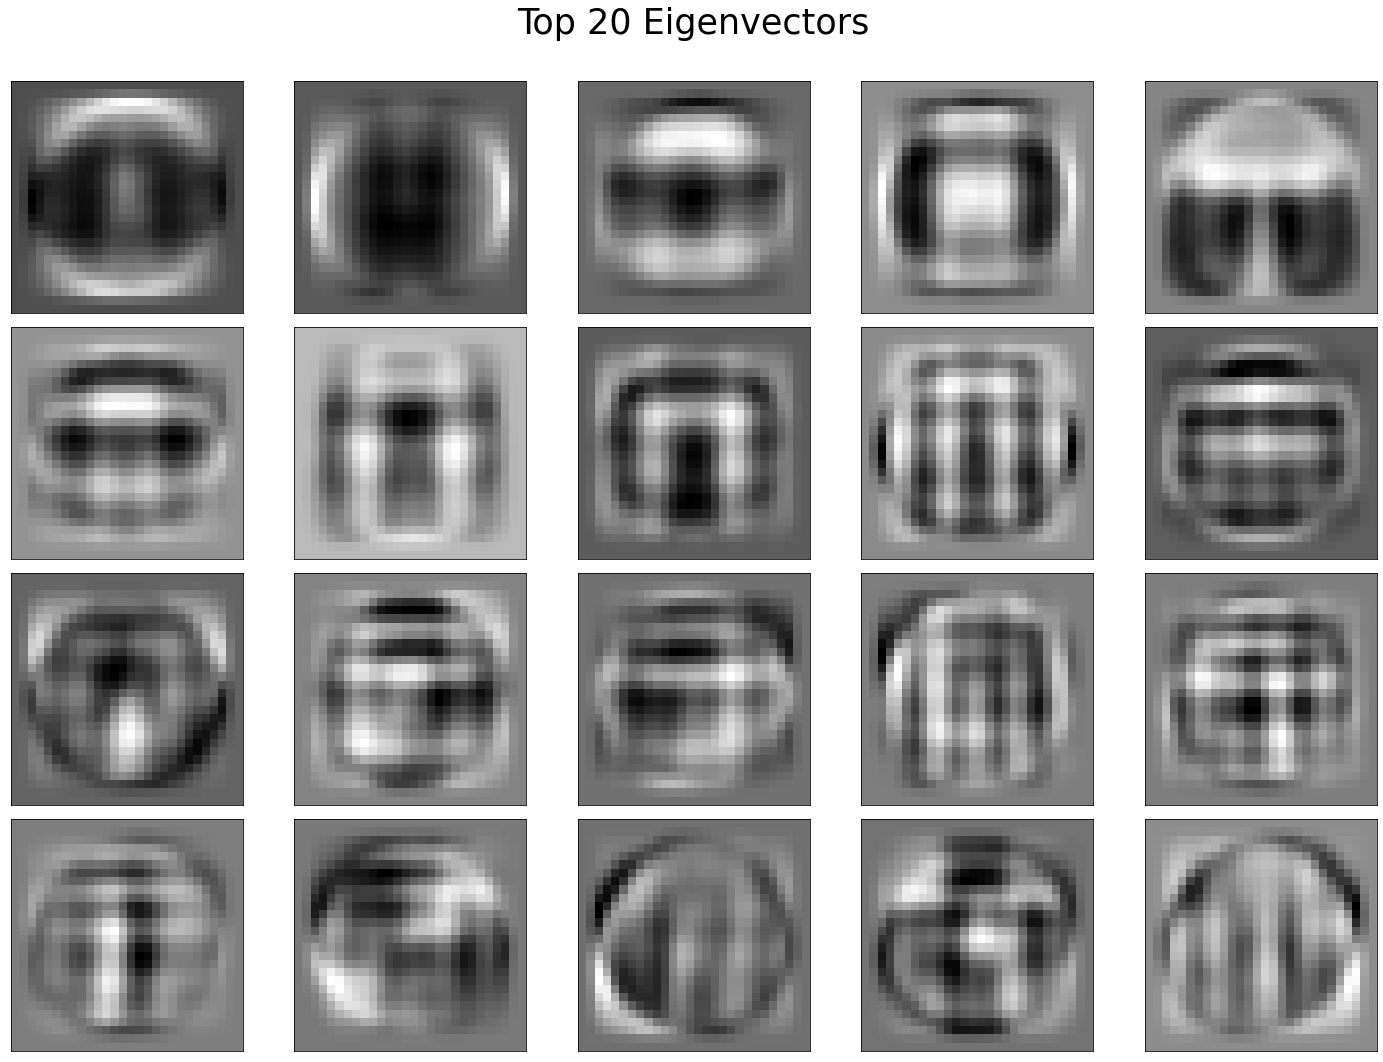

In [6]:
fig, ax = plt.subplots(4, 5, subplot_kw=dict(xticks=[], yticks=[]))
for i, eigenface in enumerate(pca_eigenvectors.T[:20]):
    im = ax[i//5, i%5].imshow(pca_eigenvectors[:,i].reshape(28,28), cmap='gray')
fig.suptitle('Top 20 Eigenvectors\n', fontsize=35)
fig.set_size_inches(20,15)
fig.show()
if SAVE_FIGURE:
    fig.tight_layout()
    plt.savefig('../images/q4/a/eigenvectors.png')

Plotting data projected into 1d, 2d and 3d using the principal components

For 1d:

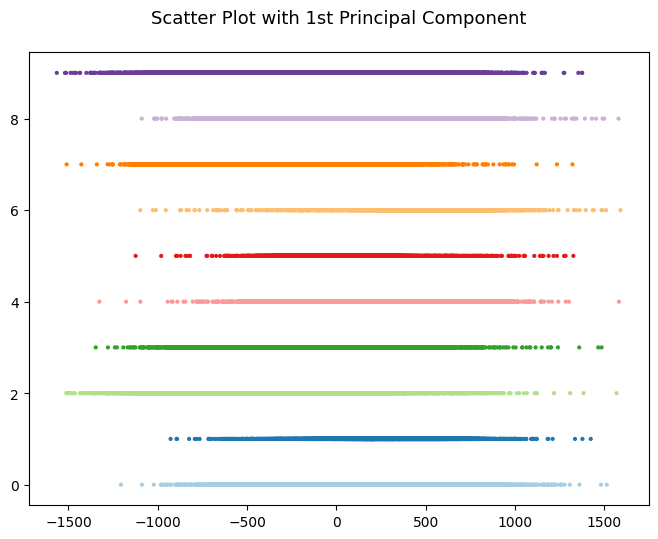

In [7]:
z_train = x_train - pca_mu.T
x_train_1d_pca = np.real(pca_eigenvectors[:, :1].T @ z_train)

figure(figsize=(8, 6), dpi=100)
plt.scatter(x_train_1d_pca[0], np.zeros(x_train_1d_pca.shape[1]) + y_train,
            color=cm.Paired(y_train), s=4)
plt.title('Scatter Plot with 1st Principal Component\n', fontsize=13)
if SAVE_FIGURE:
    fig.tight_layout()
    plt.savefig('../images/q4/a/projection_to_1d.png')

For 2d:

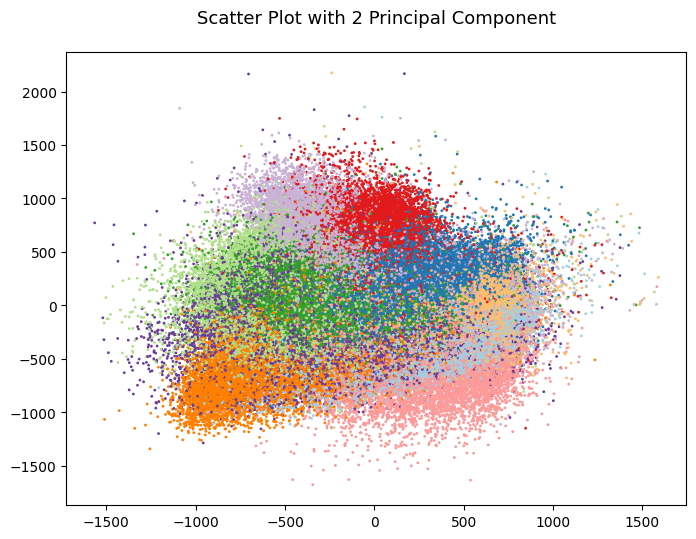

In [8]:
z_train = x_train - pca_mu.T
x_train_2d_pca = np.real(pca_eigenvectors[:, :2].T @ z_train)

figure(figsize=(8, 6), dpi=100)
plt.scatter(x_train_2d_pca[0,:], x_train_2d_pca[1,:], 
            color=cm.Paired(y_train), s=1)
plt.title('Scatter Plot with 2 Principal Component\n', fontsize=13)
if SAVE_FIGURE:
    fig.tight_layout()
    plt.savefig('../images/q4/a/projection_to_2d.png')

For 3d:

C:\Users\engmrgh\AppData\Local\Temp\ipykernel_25304\3401980205.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


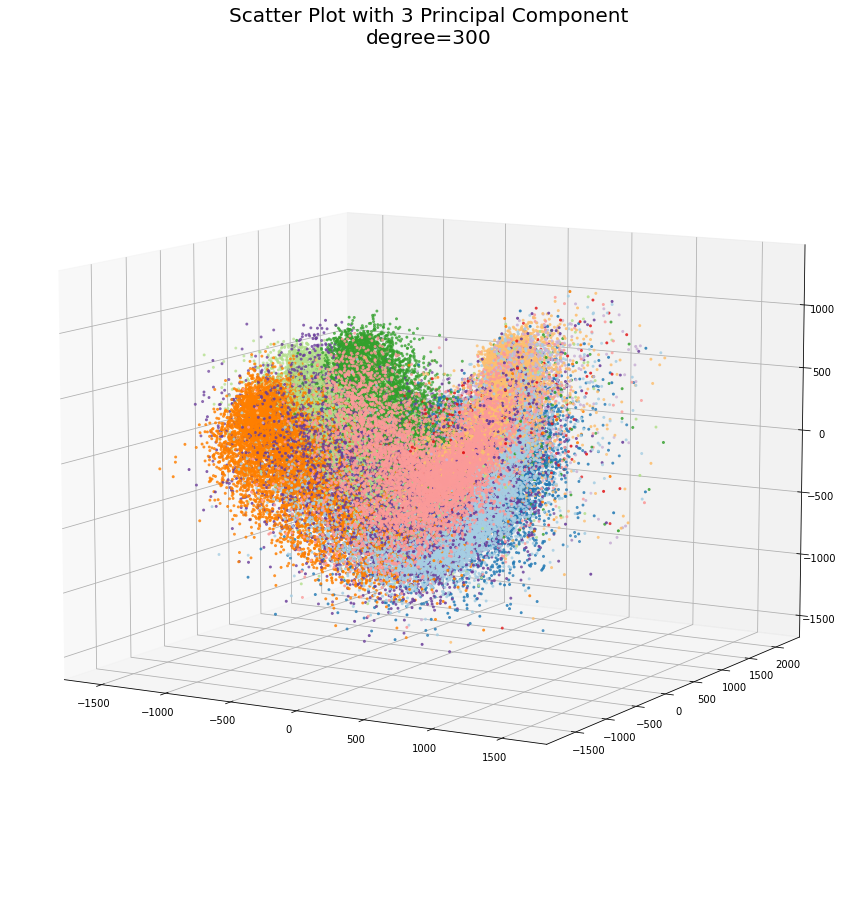

In [9]:
z_train = x_train - pca_mu.T
x_train_3d_pca = np.real(pca_eigenvectors[:, :3].T @ z_train)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x_train_3d_pca[0,:], x_train_3d_pca[1,:], x_train_3d_pca[2,:],
           color=cm.Paired(y_train), s=4)
ax.view_init(elev=10, azim=30)
fig.set_size_inches(12,15)
fig.show()
if SAVE_FIGURE:
    for degree in range(0,360,60):
        ax.view_init(elev=10., azim=degree)
        plt.title(f'Scatter Plot with 3 Principal Component\n{degree=}', fontsize=20)
        fig.tight_layout()
        plt.savefig(f'../images/q4/a/projection_to_3d_with_angle{degree}.png')

# Part B

Performing LDA on train dataset

In [10]:
mu_t = np.mean(x_train, axis=1)[np.newaxis].T
# Calculating ui's
classes = np.unique(y_train)
mu = np.zeros((len(classes), 784, 1))
for c in classes:
    mu[c] = (np.mean(x_train[:, y_train==c], axis=1)[np.newaxis].T)
# Calculate Sb
Sb = np.zeros((784, 784))
for c in classes:
    n = len(y_train[y_train==c])
    Sb += (n * (mu[c] - mu_t) @ (mu[c] - mu_t).T)
# Calculating Sw
S = np.zeros((784, 784, 10))
for c in classes:
    n = len(y_train[y_train==c])
    S[:, :, c] = (n-1) * np.cov(x_train[:, y_train == c])
Sw = np.sum(S, axis=2)
invSwSb = np.linalg.inv(Sw + 0.0001 * np.eye(784)) @ Sb
# Extracting Eigenvalues and Eigenvectors
lda_eigenvalues, lda_eigenvectors = np.linalg.eig(invSwSb)
sorted_eigenvalues_index = np.argsort((-1)*lda_eigenvalues)
lda_eigenvalues = lda_eigenvalues[sorted_eigenvalues_index]
lda_eigenvectors = lda_eigenvectors[:, sorted_eigenvalues_index]

Displaying the results in 1d and 2d

In 1d

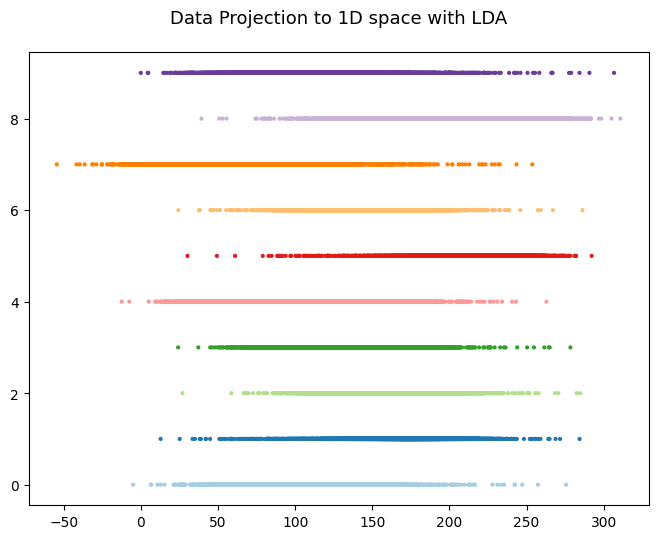

In [11]:
x_train_1d_lda = np.real(lda_eigenvectors[:, :1].T @ x_train)

figure(figsize=(8, 6), dpi=100)
plt.scatter(x_train_1d_lda[0], np.zeros(x_train_1d_lda.shape[1]) + y_train , 
            color=cm.Paired(y_train), s=4)
plt.title(f'Data Projection to 1D space with LDA\n', fontsize=13)
if SAVE_FIGURE:
    fig.tight_layout()
    plt.savefig('../images/q4/b/projection_to_1d.png')

In 2d

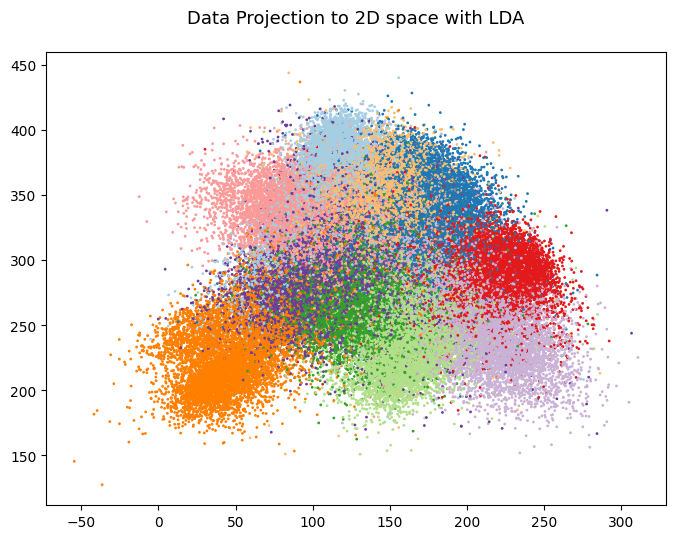

In [12]:
x_train_2d_lda = np.real(lda_eigenvectors[:, :2].T @ x_train)

figure(figsize=(8, 6), dpi=100)
plt.scatter(x_train_2d_lda[0,:], x_train_2d_lda[1,:], color=cm.Paired(y_train), s=1)
plt.title(f'Data Projection to 2D space with LDA\n', fontsize=13)
if SAVE_FIGURE:
    fig.tight_layout()
    plt.savefig('../images/q4/b/projection_to_2d.png')

# Part C

In [13]:
def kmeans(x_train, k, centers=None):
    number_of_features = x_train.shape[0]
    number_of_data = x_train.shape[1]
    if centers is None:
        centers = x_train[:, np.random.choice(range(number_of_data), k, replace=False)]
    current_centers = centers
    distance_between_new_and_previous_centers = float("inf")
    while distance_between_new_and_previous_centers > 0.001:
        previous_centers = current_centers
        distances = np.zeros((k, number_of_data))
        for i, center in enumerate(centers.T):
            distances[i, :] = \
                np.sqrt(np.sum((x_train - center[np.newaxis].T)**2,
                               axis=0))
        y_predicted = np.argmin(distances, axis=0)
        centers = np.zeros((number_of_features,k))
        for i in range(k):
            centers[:, i] = np.mean(x_train[:, y_predicted==i], axis=1)
        current_centers = centers
        distance_between_new_and_previous_centers = \
            np.sqrt(np.sum((current_centers - previous_centers)**2))
    return centers, y_predicted

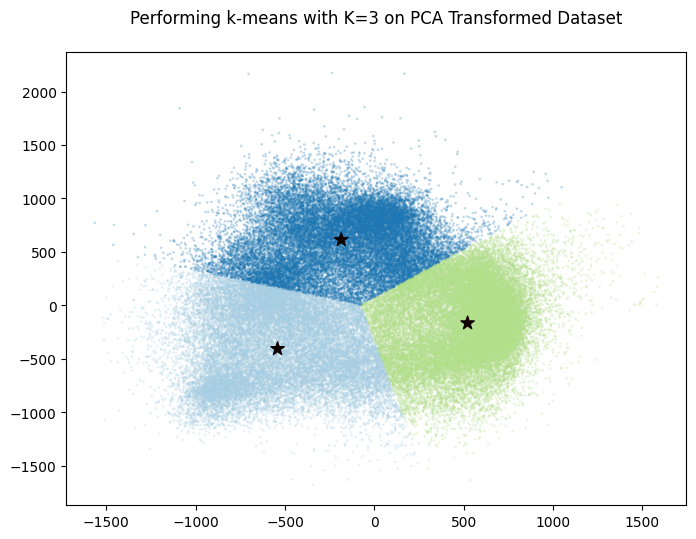

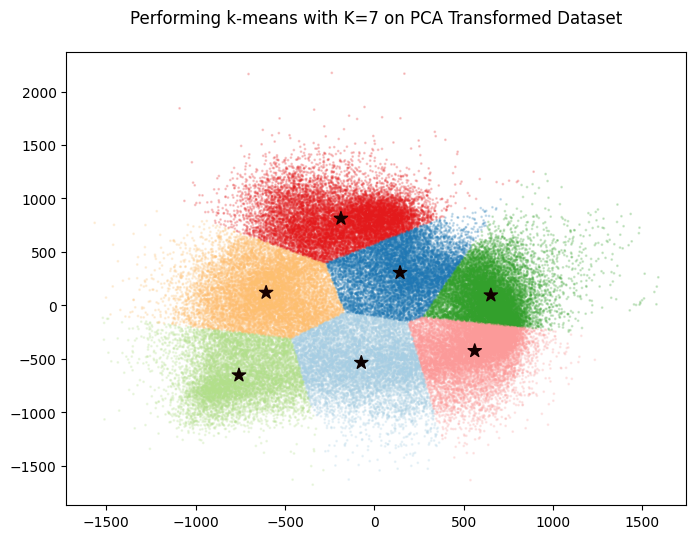

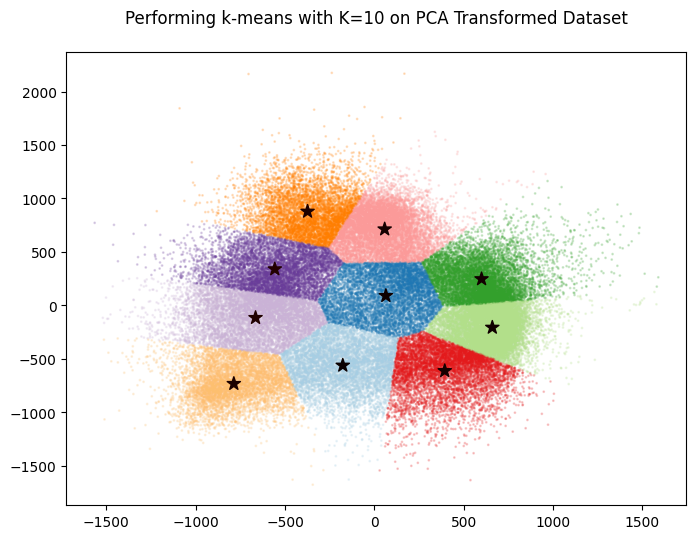

In [14]:
for k in [3, 7, 10]:
    centers, y_predicted = kmeans(x_train_2d_pca, k)
    figure(figsize=(8, 6), dpi=100)
    plt.scatter(x_train_2d_pca[0,:], x_train_2d_pca[1,:], 
                color=cm.Paired(y_predicted), s=1, alpha=0.2)
    plt.scatter(centers[0, :], centers[1, :], 
                color=cm.hot(sorted(list(set(y_predicted)))), marker='*',
                s=100)
    plt.title(f'Performing k-means with K={k} on PCA Transformed Dataset\n')
    if SAVE_FIGURE:
        plt.savefig(f'../images/q4/c/{k}.png')
    plt.show()

# Part D

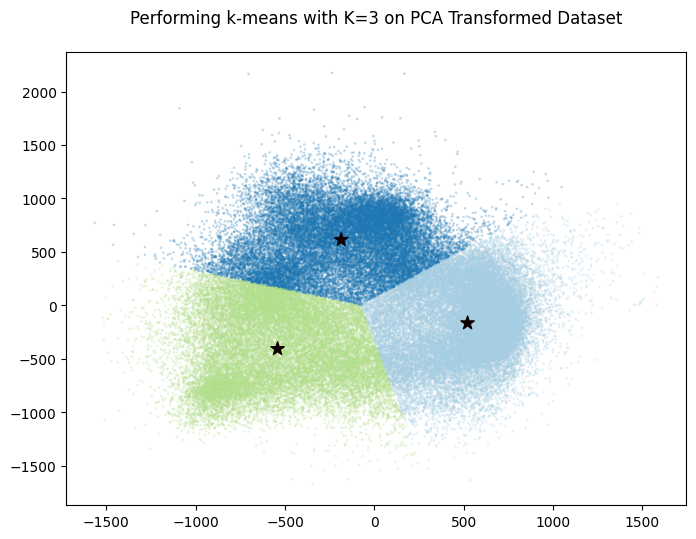

In [15]:
k = 3
centers = np.zeros((2,k))
centers[:, 0] = \
    np.mean(x_train_2d_pca[:, (y_train==0)|(y_train==2)|(y_train==4)|(y_train==6)], axis=1)
centers[:, 1] = np.mean(x_train_2d_pca[:, (y_train==1)|(y_train==3)], axis=1)
centers[:, 2] = \
    np.mean(x_train_2d_pca[:, (y_train==5)|(y_train==7)|(y_train==8)|(y_train==9)], axis=1)
centers, y_predicted = kmeans(x_train_2d_pca, k, centers=centers)
figure(figsize=(8, 6), dpi=100)
plt.scatter(x_train_2d_pca[0,:], x_train_2d_pca[1,:], 
            color=cm.Paired(y_predicted), s=1, alpha=0.2)
plt.scatter(centers[0, :], centers[1, :], 
            color=cm.hot(sorted(list(set(y_predicted)))), marker='*',
            s=100)
plt.title(f'Performing k-means with K={k} on PCA Transformed Dataset\n')
if SAVE_FIGURE:
    plt.savefig(f'../images/q4/d/{k}.png')
plt.show()

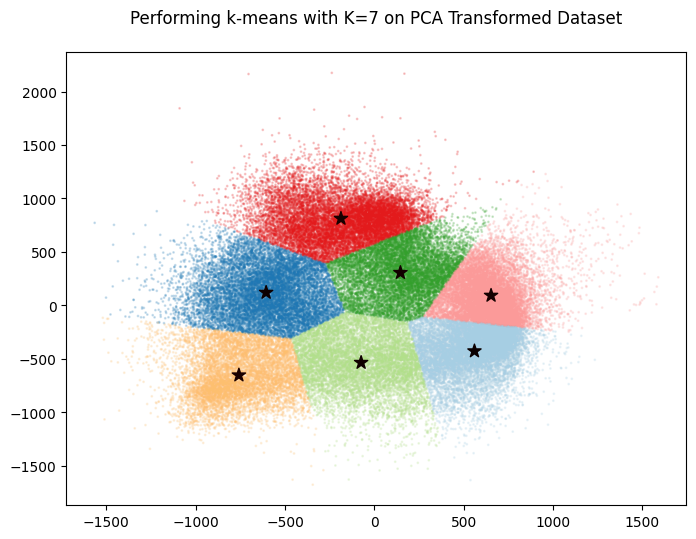

In [16]:
k = 7
centers = np.zeros((2,k))
centers[:, 0] = np.mean(x_train_2d_pca[:, (y_train==0)|(y_train==1)|(y_train==4)], axis=1)
centers[:, 1] = np.mean(x_train_2d_pca[:, y_train==2], axis=1)
centers[:, 2] = np.mean(x_train_2d_pca[:, y_train==3], axis=1)
centers[:, 3] = np.mean(x_train_2d_pca[:, y_train==5], axis=1)
centers[:, 4] = np.mean(x_train_2d_pca[:, y_train==6], axis=1)
centers[:, 5] = np.mean(x_train_2d_pca[:, y_train==8], axis=1)
centers[:, 6] = np.mean(x_train_2d_pca[:, (y_train==7)|(y_train==9)], axis=1)
centers, y_predicted = kmeans(x_train_2d_pca, k, centers=centers)
figure(figsize=(8, 6), dpi=100)
plt.scatter(x_train_2d_pca[0,:], x_train_2d_pca[1,:], 
            color=cm.Paired(y_predicted), s=1, alpha=0.2)
plt.scatter(centers[0, :], centers[1, :], 
            color=cm.hot(sorted(list(set(y_predicted)))), marker='*',
            s=100)
plt.title(f'Performing k-means with K={k} on PCA Transformed Dataset\n')
if SAVE_FIGURE:
    plt.savefig(f'../images/q4/d/{k}.png')
plt.show()

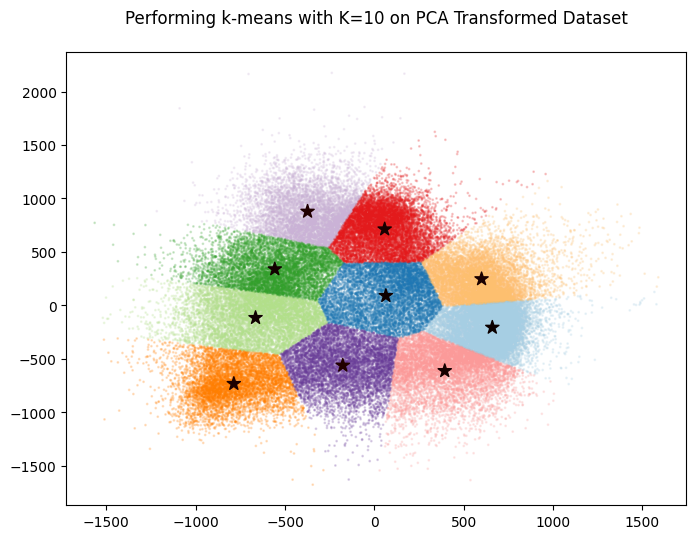

In [17]:
k = 10
centers = np.zeros((2,k))
for i in set(y_train):
    centers[:, i] = np.mean(x_train_2d_pca[:, y_train==i], axis=1)
centers, y_predicted = kmeans(x_train_2d_pca, k, centers=centers)
figure(figsize=(8, 6), dpi=100)
plt.scatter(x_train_2d_pca[0,:], x_train_2d_pca[1,:], 
            color=cm.Paired(y_predicted), s=1, alpha=0.2)
plt.scatter(centers[0, :], centers[1, :], 
            color=cm.hot(sorted(list(set(y_predicted)))), marker='*',
            s=100)
plt.title(f'Performing k-means with K={k} on PCA Transformed Dataset\n')
if SAVE_FIGURE:
    plt.savefig(f'../images/q4/d/{k}.png')
plt.show()

# Part E

We use the following links to find the point where we can capture 0.95% of 
variance. 
- [Link1](https://stats.stackexchange.com/questions/22569/pca-and-proportion-of-variance-explained)
- [Link2](https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/)

In [18]:
total_variance = np.sum(pca_eigenvalues)
for i, _ in enumerate(pca_eigenvalues):
    captured_variance = np.sum(pca_eigenvalues[:i]) / total_variance
    if captured_variance > 0.95:
        break
print(f'We need {i} principal component to preserve {captured_variance:.5f}'
      f' of covariance')

We need 271 principal component to preserve 0.95015 of covariance


Regenerate some data using 271 principal components

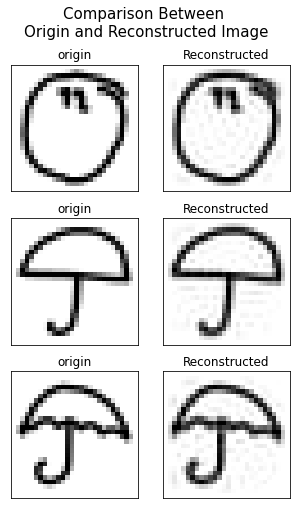

In [19]:
n = len(y_train)
selected_items = x_train[:, np.random.choice(range(n), 3, replace=False)]
projected_items = pca_eigenvectors[:, :271].T @ (selected_items - pca_mu.T)
reconstructed_items = pca_eigenvectors[:, :271] @ projected_items + pca_mu.T

fig, ax = plt.subplots(3, 2, subplot_kw=dict(xticks=[], yticks=[]))
for i, (origin_item, reconstructed_item) in \
    enumerate(zip(selected_items.T, reconstructed_items.T)):
    ax[i, 0].imshow(origin_item.reshape(28,28), cmap='gray', vmin=0, vmax=255)
    ax[i, 0].set_title('origin')
    ax[i, 1].imshow(reconstructed_item.reshape(28,28), cmap='gray', vmin=0, vmax=255)
    ax[i, 1].set_title('Reconstructed')
fig.suptitle('Comparison Between \n'
             'Origin and Reconstructed Image\n', fontsize=15)
fig.set_size_inches(5,8)
if SAVE_FIGURE:
    plt.savefig(f'../images/q4/e/origin_and_reconstructed.png')

# Part F

Projecting Data into 271d space

In [20]:
x_train_271d_pca = pca_eigenvectors[:, :271].T @ (x_train - pca_mu.T)
centers, y_predicted = kmeans(x_train_271d_pca, 10)

Displaying 10 member for each cluster

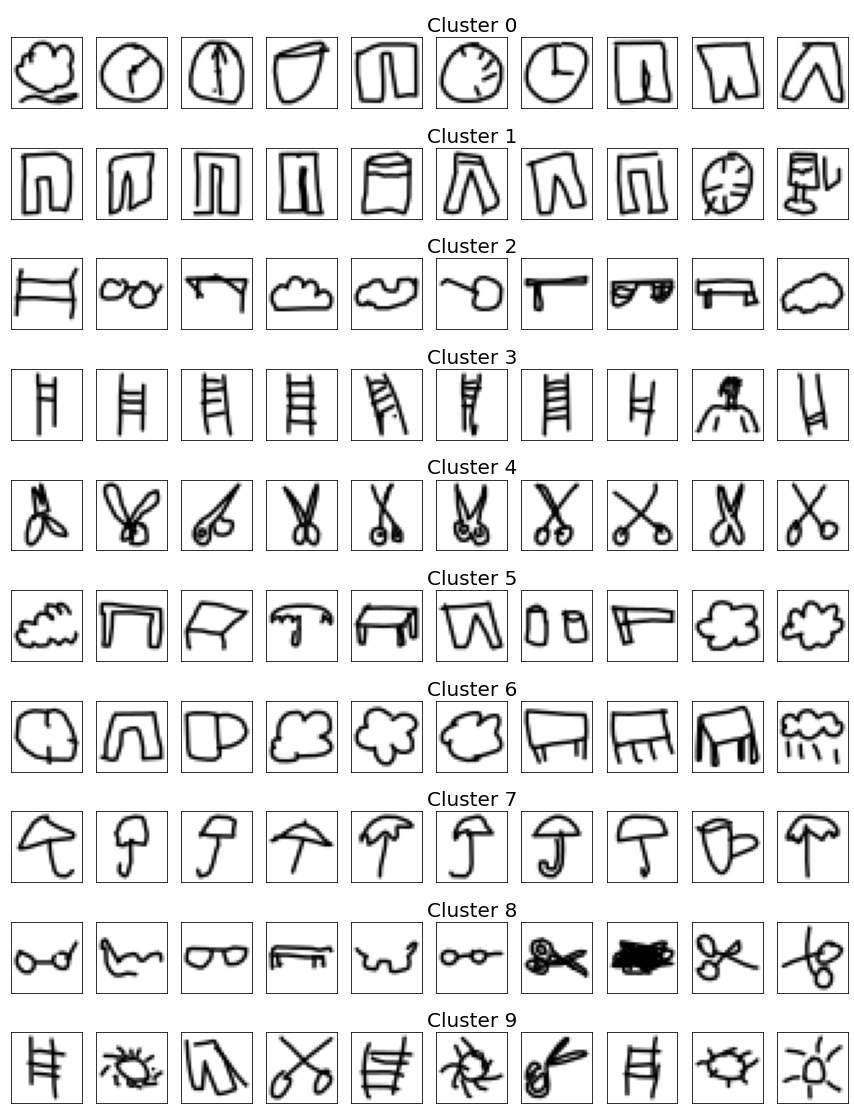

In [21]:
n = len(y_train)
fig, ax = plt.subplots(10, 10, subplot_kw=dict(xticks=[], yticks=[]))
for cluster in set(y_predicted):
    n_cluster = np.count_nonzero(y_predicted==cluster)
    samples_of_cluster = \
        x_train[:, y_predicted==cluster][:, np.random.choice(range(n_cluster), 10, replace=False)]
    for i, sample in enumerate(samples_of_cluster.T):
        ax[cluster, i].imshow(sample.reshape(28,28), cmap='gray',
                              vmin=0, vmax=255)
        if i == 5:
            ax[cluster, i].set_title(f'Cluster {cluster}', fontsize=20)
        else:
            ax[cluster, i].set_title(f'\n')
fig.set_size_inches(15,20)
if SAVE_FIGURE:
    plt.savefig(f'../images/q4/f/samples.png')

# Part G

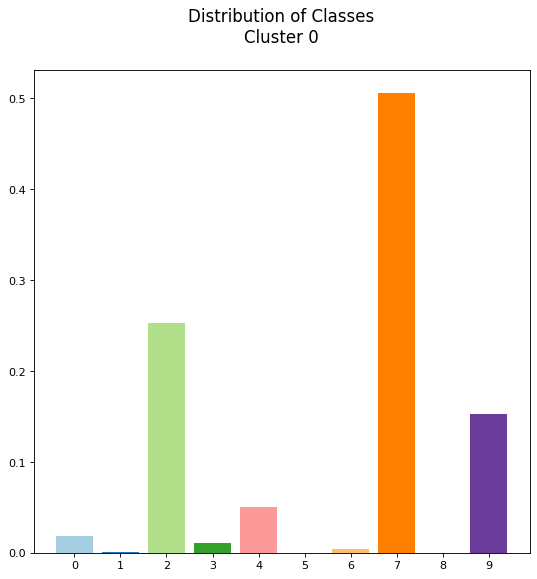

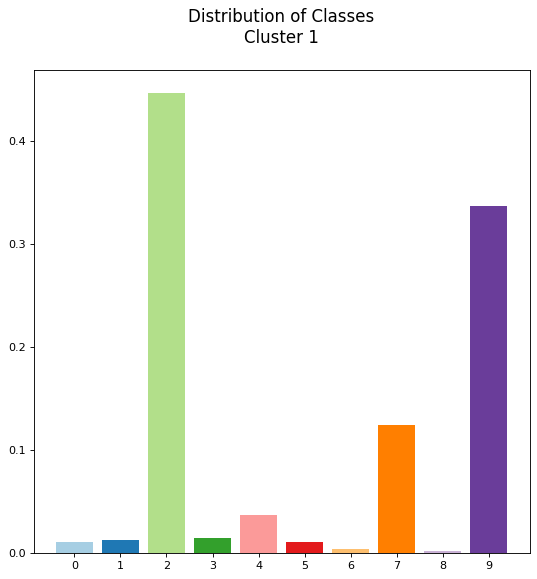

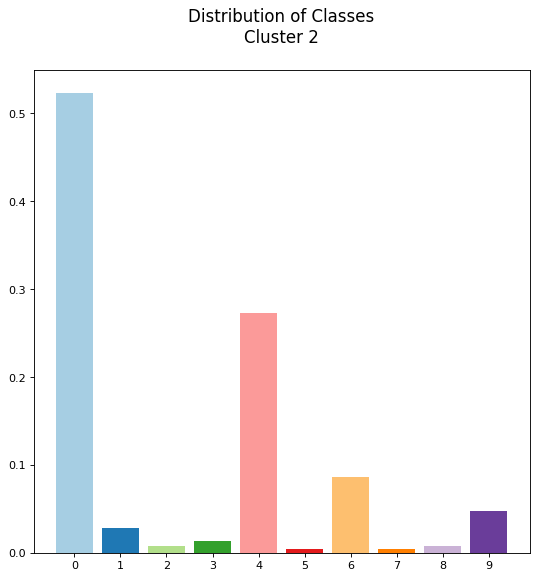

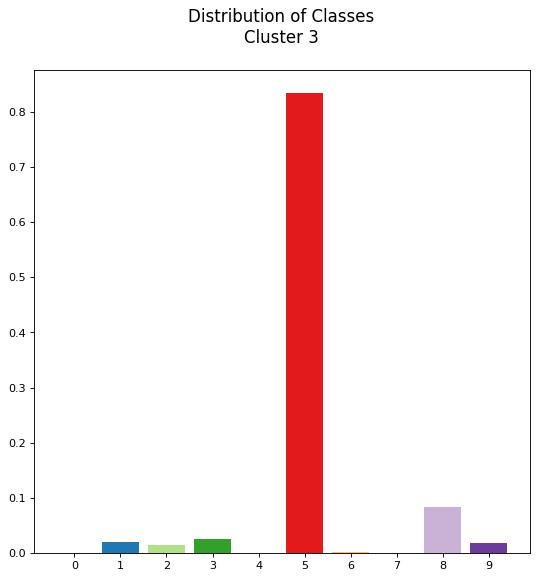

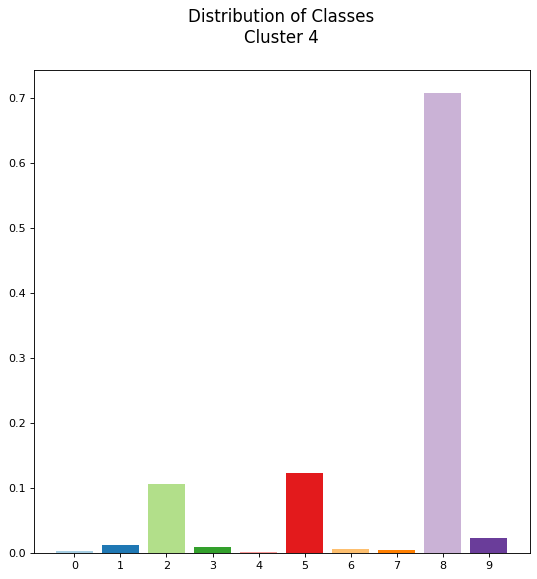

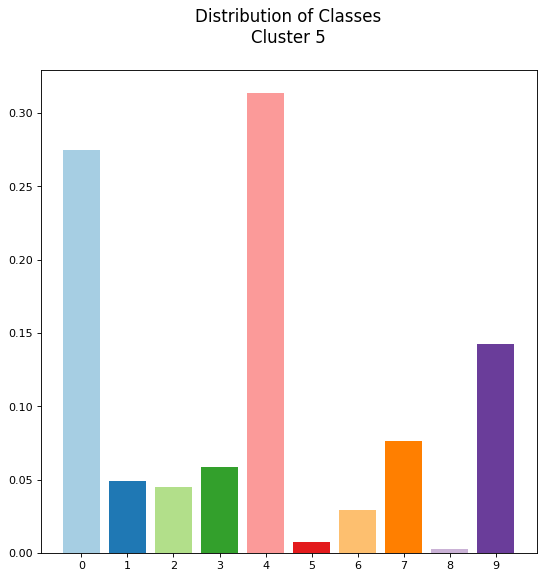

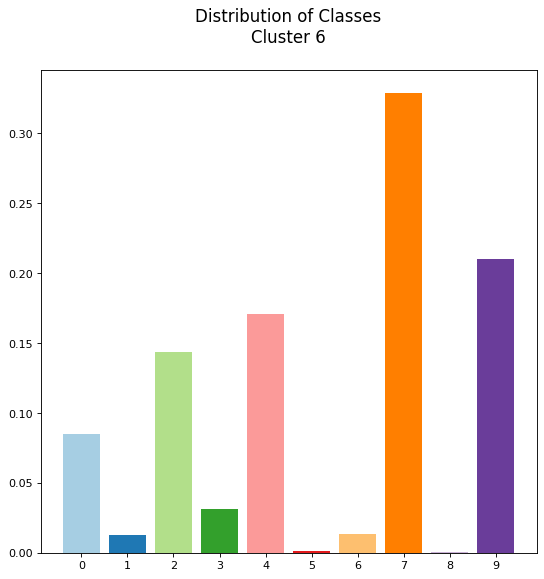

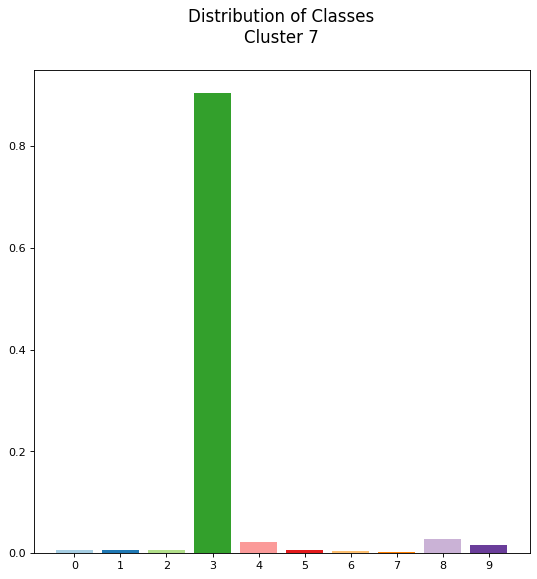

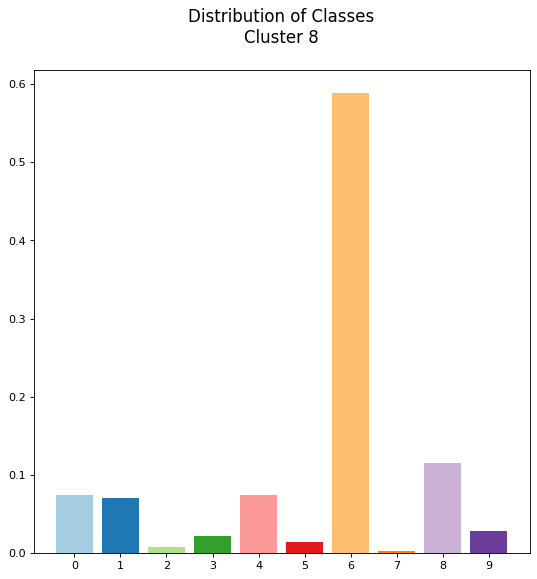

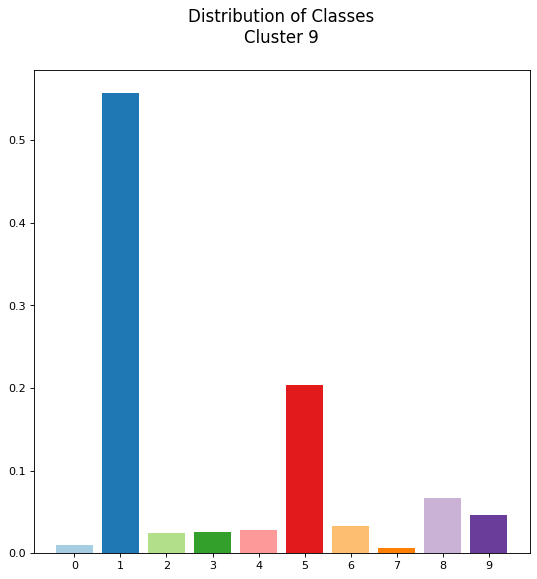

In [22]:
cluster = dict()
for y in np.unique(y_predicted):
    uniq, counts = np.unique(y_train[y_predicted==y], return_counts=True)
    cluster[y] = dict(zip(uniq, counts / len(y_predicted[y_predicted==y])))

ind = list(set(y_predicted))
for label, percentages in cluster.items():
    figure(figsize=(8, 8), dpi=80)
    plt.bar(ind, list(percentages.values()), color=cm.Paired(ind))
    plt.title(f'Distribution of Classes\nCluster {label}\n', fontsize=15)
    plt.xticks(ind)
    if SAVE_FIGURE:
        plt.savefig(f'../images/q4/g/cluster{label}.png')
    plt.show()

# Part H

Casting from 271d to 2d and plotting the clusters

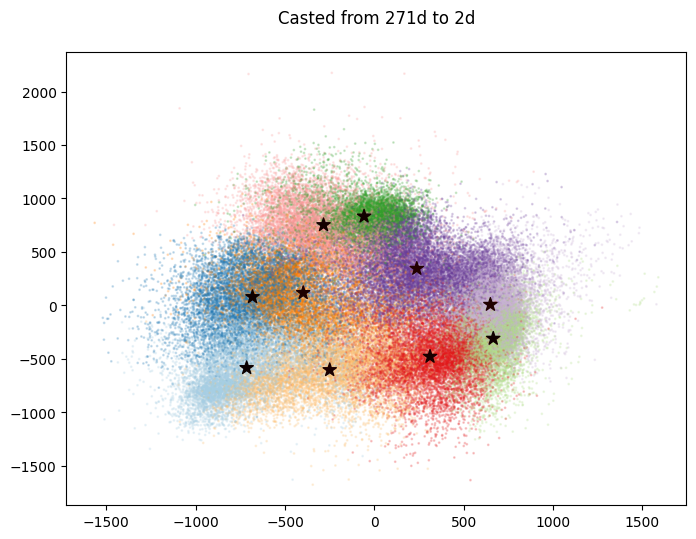

In [23]:
figure(figsize=(8, 6), dpi=100)
plt.scatter(x_train_271d_pca[0,:], x_train_271d_pca[1,:], 
            color=cm.Paired(y_predicted), s=1, alpha=0.2)
plt.scatter(centers[0, :], centers[1, :], 
            color=cm.hot(sorted(list(set(y_predicted)))), marker='*',
            s=100)
plt.title(f'Casted from 271d to 2d\n')
if SAVE_FIGURE:
    plt.savefig(f'../images/q4/h/2d.png')
plt.show()

Casting from 271d to 3d space

C:\Users\engmrgh\AppData\Local\Temp\ipykernel_25304\621388422.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


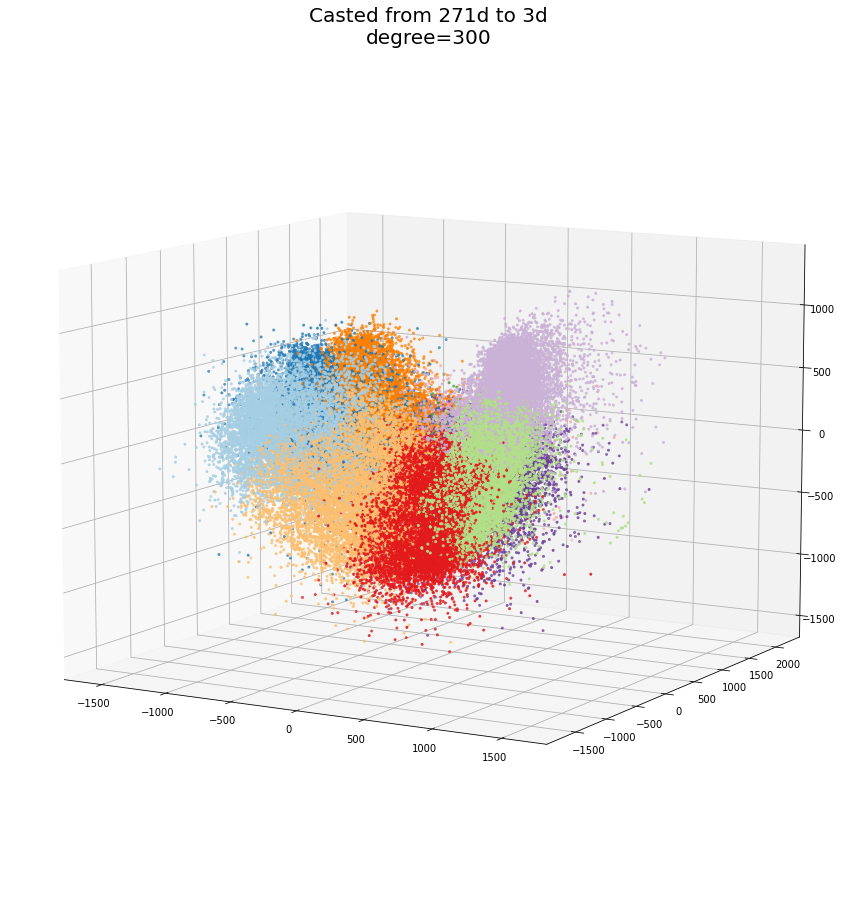

In [24]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x_train_271d_pca[0,:], x_train_271d_pca[1,:], x_train_3d_pca[2,:],
           color=cm.Paired(y_predicted), s=4)
ax.scatter(centers[0, :], centers[1, :], centers[2, :],
            color=cm.hot(sorted(list(set(y_predicted)))), marker='*',
            s=100)
ax.view_init(elev=10, azim=30)
fig.set_size_inches(12,15)
fig.show()
if SAVE_FIGURE:
    for degree in range(0,360,60):
        ax.view_init(elev=10., azim=degree)
        plt.title(f'Casted from 271d to 3d\n{degree=}', fontsize=20)
        fig.tight_layout()
        plt.savefig(f'../images/q4/h/3dangle{degree}.png')